In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

%matplotlib inline

In [52]:
l    = 100
x, y = np.indices((l, l))

c0 = (28, 24)
c1 = (40, 50)
c2 = (67, 58)
c3 = (24, 70)

r0, r1, r2, r3 = 16, 14, 15, 14

circ0 = (x - c0[0]) ** 2 + (y - c0[1]) ** 2 < r0 ** 2
circ1 = (x - c1[0]) ** 2 + (y - c1[1]) ** 2 < r1 ** 2
circ2 = (x - c2[0]) ** 2 + (y - c2[1]) ** 2 < r2 ** 2
circ3 = (x - c3[0]) ** 2 + (y - c3[1]) ** 2 < r3 ** 2


img = circ0 + circ1 + circ2 + circ3

In [60]:
mask = img.astype(bool)

img = img.astype(float)
img += 1 + 0.3 * np.random.randn(*img.shape)

In [61]:
graph      = image.img_to_graph(img, mask=mask)
#graph.data = np.exp(-graph.data / graph.data.std())
graph.data = np.exp(-0.05*graph.data**2)

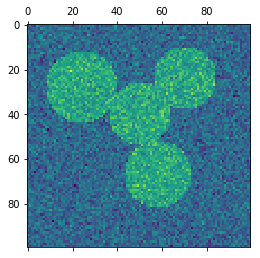

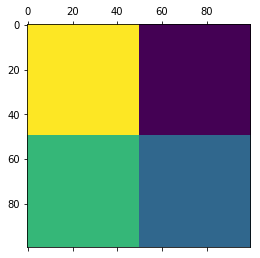

In [62]:
labels         = spectral_clustering(graph, n_clusters=4, eigen_solver='arpack')
label_im       = np.full(mask.shape, -1.)
label_im[mask] = labels

plt.matshow(img)
plt.matshow(label_im)

plt.show()

In [2]:
from skimage       import data
from skimage.color import rgb2grey

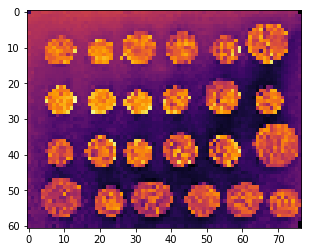

In [14]:
#img = rgb2grey( data.checkerboard() )
img = rgb2grey( data.coins() )
#img = rgb2grey( data.camera() )
#img = rgb2grey( data.chelsea() )
img = img[::5,::5]/256.
plt.imshow(img,'inferno')

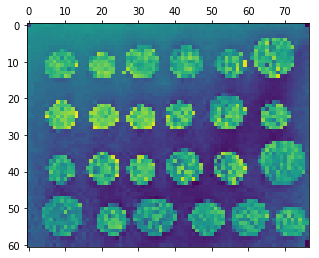

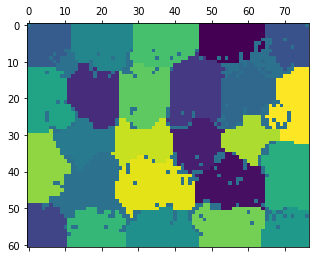

In [17]:
mask       = img.astype(bool)
img        = img.astype(float)
graph      = image.img_to_graph(img, mask=mask)
graph.data = np.exp(-graph.data / graph.data.std())
#graph.data = np.exp(-0.05*graph.data**2)

labels         = spectral_clustering(graph, n_clusters=25, eigen_solver='arpack')
label_im       = np.full(mask.shape, -1.)
label_im[mask] = labels

plt.matshow(img)
plt.matshow(label_im)

plt.show()